
ARIMA 
Loading data... 

******************************************************************** 
 Plot Original Series


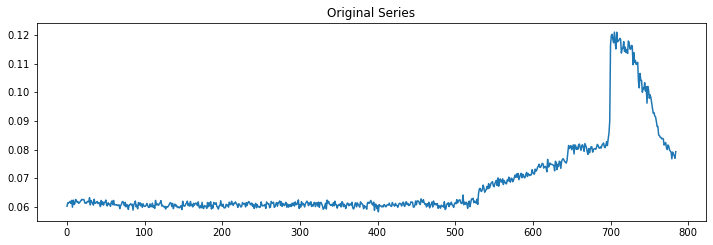


******************************************************************** 
 Plot Partial Autocorrelation


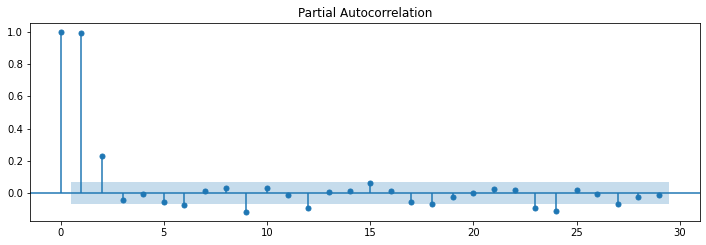


******************************************************************** 
 Plot Autocorrelation


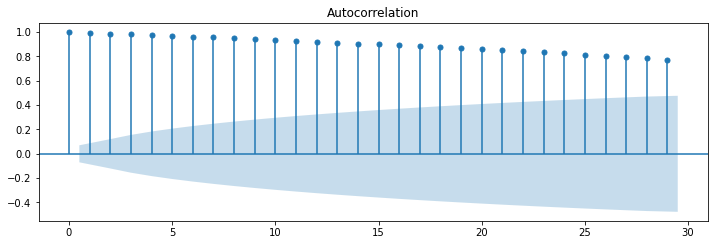

Normal ARIMA(1,0,40)                                                                                      
======================================================= ==================================================
Dependent Variable: Bearing1                            Method: PML                                       
Start Date: 825                                         Unnormalized Log Posterior: 420.1002              
End Date: 981                                           AIC: -754.2004                                    
Number of observations: 157                             BIC: -622.7818                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0363     0.0072     5.0191   0.0      (0.0221 | 0.0504)        
AR(1)                                

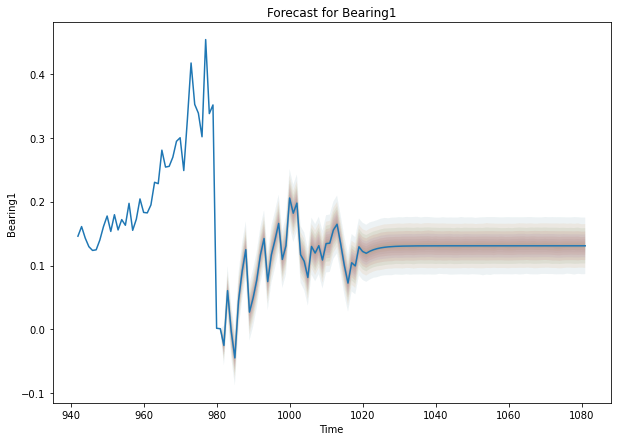

      Bearing1
982  -0.024989
983   0.060687
984  -0.002738
985  -0.044505
986   0.044752
...        ...
1077  0.130813
1078  0.130813
1079  0.130813
1080  0.130813
1081  0.130813

[100 rows x 1 columns]
CPU utilization:  22.45 %
All dataset average:  0.081
Predicted dataset average:  0.1207
All dataset st_deviation:  0.0402
Predicted dataset st_deviation:  0.0358
ARIMA TIME ---> 69.81s

LSTM 
Loading data... 

******************************************************************** 
Prepare data... 
Length of Data 982
Creating training data...
Training data shape  :  (684, 100)
Creating test data...
Test data shape  : (96, 100)
Shape X_train (684, 99)
Shape X_test (96, 99)
Shape X_train (684, 99, 1)
Shape X_test (96, 99, 1)

******************************************************************** 
Genetate Model... 

******************************************************************** 
Training data... 
Training...
Epoch 1/10
65/65 [==============================] - 5s 73ms/step - loss: 0.244

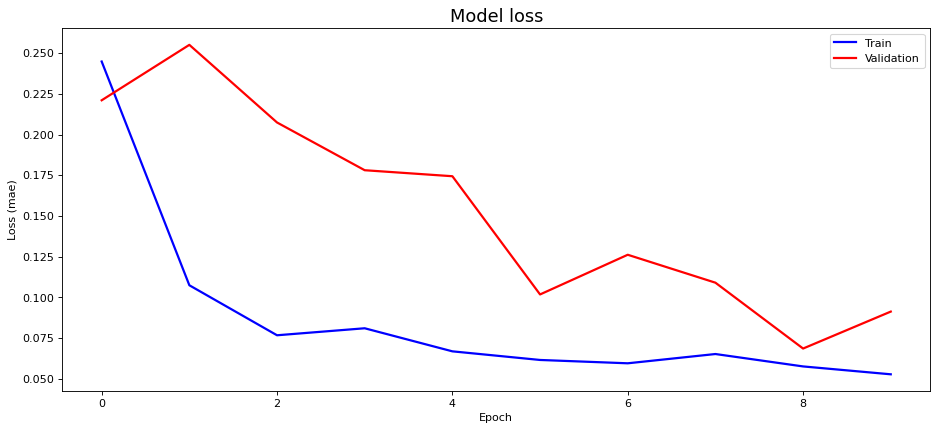


******************************************************************** 
Predicting...
Reshaping predicted
[-0.29332882 -0.28965592 -0.28444672 -0.27829108 -0.2630905  -0.24878627
 -0.25270975 -0.28228658 -0.33360898 -0.40066162 -0.4739359  -0.545592
 -0.612048   -0.6684421  -0.71349835 -0.7473843  -0.76674163 -0.7704325
 -0.7484009  -0.6930741  -0.5971626  -0.45451084 -0.26997143 -0.06498215
  0.13255     0.2826907   0.3564326   0.37960052  0.378617    0.36650407
  0.38305035  0.4046514   0.40504348  0.39243707  0.36058375  0.330091
  0.29891995  0.29566312  0.316038    0.33998883  0.35671648  0.34410873
  0.29121977  0.2295627   0.20007975  0.20223561  0.25178468  0.36224288
  0.53744274  0.80421317  1.2470021   1.5748626   1.6915147   1.6428313
  1.4325061   1.1419005   0.8605344   0.62111396  0.5010955   0.48303127
  0.5941054   0.7310474   0.79168534  0.75124913  0.6480564   0.5664133
  0.60105395  0.82665145  1.0907276   1.433833    1.6691647   1.8385178
  1.9046247   2.0670311   2

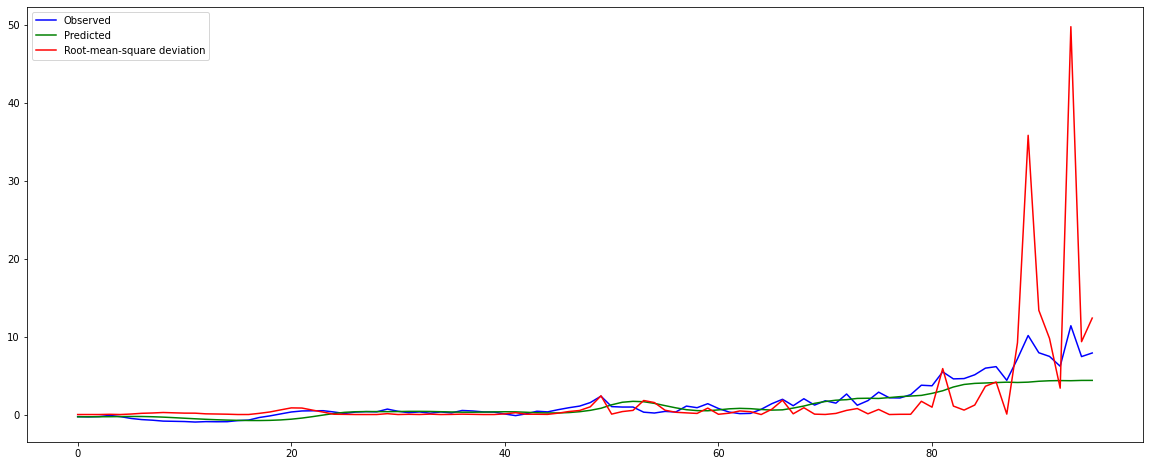

Training duration:45.92347598075867
CPU utilization:  62.68 %
All dataset average:  0.081
Predicted dataset average:  1.061
All dataset st_deviation:  0.0402
Predicted dataset st_deviation:  1.5395
LSTM TIME ---> 46.41s


In [1]:
from threading import Thread
from time import time, sleep
from statistics import mean, stdev
from psutil import cpu_percent
from pandas import read_csv
from termcolor import  colored
from modules import run_arima as ARIMA
from modules import run_lstm as LSTM


def exec_time(func, args:list) -> tuple:
    '''
    Function that measures execution time of a given function
    '''
    intiTime = time()
    try:
        func(*args)
    except Exception as e:
        print('ERROR: ',e)
    elapsedTime = round(time()-intiTime, 2)
    return str(elapsedTime)+'s'


def get_cpu_utilization():

    def cpu_util():
        cpu_data = []
        while(not IS_Process_end):
            sleep(1)
            cpu_data.append(cpu_percent())
        print('CPU utilization: ', round(mean(cpu_data),2),'%')

    return Thread(
        target=cpu_util
    )


def csv_to_df(csv_file:str):
    '''returns numpy array of values from a dataFrame)'''
    print('Loading data... ')
    df = read_csv(csv_file, parse_dates=[0], infer_datetime_format=True)
    return df


def run_arima(file:str, column:str):
    global IS_Process_end
    IS_Process_end = False
    df = csv_to_df(file)
    ARIMA_config = {
        'test_size': 0.2,
        'AR': 1,
        'MA': 40,
        'target_method': 'PML',
        'h': 100,
        'pv': 40
    }
    cpu_thread = get_cpu_utilization()
    cpu_thread.start()
    prediction = ARIMA.run(df, column, ARIMA_config)
    IS_Process_end = True
    cpu_thread.join()
    print('All dataset average: ', round(mean(df[column].tolist()),4))
    print('Predicted dataset average: ', round(mean(prediction),4))
    print('All dataset st_deviation: ',round(stdev(df[column].tolist()),4))
    print('Predicted dataset st_deviation: ',round(stdev(prediction),4))


def run_lstm(file:str, column:str):
    global IS_Process_end
    IS_Process_end = False
    df = csv_to_df(file)
    LSTM_config = {
        'test_size': 0.2,
        'is_normalized': True,
        'epochs': 10,
        'batch_size': 10,
        'validation_split': 0.05,
        'loss': 'mean_squared_error',
        'optimizer': 'rmsprop',
        'metrics': ['mean_absolute_percentage_error']
    }
    cpu_thread = get_cpu_utilization()
    cpu_thread.start()
    prediction = LSTM.run(df, column, LSTM_config)
    IS_Process_end = True
    cpu_thread.join()
    print('All dataset average: ', round(mean(df[column].tolist()),4))
    print('Predicted dataset average: ', round(mean(prediction),4))
    print('All dataset st_deviation: ',round(stdev(df[column].tolist()),4))
    print('Predicted dataset st_deviation: ',round(stdev(prediction),4))


def main():
    paths = {
        'vibration':['Averaged_BearingTest_Dataset.csv','Bearing1']
    }
    div = colored('\n===========================================','magenta')
    for solution in ['ARIMA','LSTM']:
        print(div,colored('\n'+solution,'magenta'),div)

        if solution == 'ARIMA':
            elapsedTime = exec_time(run_arima, args=paths['vibration'])
        elif solution == 'LSTM':
            elapsedTime = exec_time(run_lstm, args=paths['vibration'])

        print(solution,"TIME --->", elapsedTime)


main()
